# Example: Downloading datasets from the Climate Data Store with the `cdsapi`

> [!NOTE]
> The online laboratory has only been tested in recent Firefox and Chrome browsers. Some features may not (yet) be supported in Safari browsers.

> [!CAUTION]
> Any changes you make to this notebook will be lost once the page is closed or refreshed. Please download any files you would like to keep.

## The Climate Data Store

The Climate Data Store (CDS) provides free open access to information about the past, present and future climate, including observations, historical records, reanalyses, forecasts, and projections. The CDS can be accessed online at <https://cds.climate.copernicus.eu/> or programmatically using the `cdsapi` Python package.

## Installing and configuring the `cdsapi` package

To run this example, you need a CDS account and your API key (personal access token), which is available from <https://cds.climate.copernicus.eu/how-to-api>.

Please enter your API key to configure the `cdsapi.Client` in the next cell.

Please remember that you must keep your API key private and should not share a notebook that contains your personal API key.

In [1]:
import cdsapi

client = cdsapi.Client(
    url="https://cds.climate.copernicus.eu/api",
    key="<CDS-API-KEY>",
)

[pyodide]: Loading cdsapi, cads-api-client, attrs, multiurl, tqdm, typing-extensions, setuptools, distutils
[pyodide]: Loaded attrs, cads-api-client, cdsapi, distutils, multiurl, setuptools, tqdm, typing-extensions


## Retrieving the dataset

You can now retrieve the following example NetCDF dataset.

> [!NOTE]  
> Retrieving a dataset from the Climate Data Store may take a long time to process, ranging from minutes to hours, as data requests are served on the fly using a queueing system. If you intend to reuse a dataset several times, consider downloading it to your local machine instead of fetching it from the CDS every time.

Once the download has completed, you should have a new `02-t2m.nc` file in the `data/` subdirectory.

In [2]:
from pathlib import Path

req = client.retrieve(
    "reanalysis-era5-single-levels",
    {
        "variable": "2t",
        "product_type": "reanalysis",
        "date": "2012-12-01",
        "time": "14:00",
        "format": "netcdf",
    },
)

data_path = req.download(Path("data") / "02-t2m.nc")

2024-10-08 14:11:17,087 WARNING [2024-10-08T11:11:16.445051] You are using a deprecated API endpoint. If you are using cdsapi, please upgrade to the latest version.
2024-10-08 14:11:17,089 INFO Request ID is 07c45817-3a8d-4880-b4ff-8ea017c350ad
2024-10-08 14:11:17,590 INFO status has been updated to accepted
2024-10-08 14:11:19,534 INFO status has been updated to running
2024-10-08 14:11:21,992 INFO status has been updated to successful
/lib/python3.11/site-packages/multiurl/base.py:49: TqdmMonitorWarning: tqdm:disabling monitor support (monitor_interval = 0) due to:
can't start new thread
  return tqdm(


In [3]:
import netCDF4
import xarray as xr

ds = xr.open_dataset(data_path)
ds

[pyodide]: Loading netcdf4, cftime, h5py, pkgconfig, xarray, pandas, tzdata
[pyodide]: Loaded cftime, h5py, netcdf4, pandas, pkgconfig, tzdata, xarray


<xarray.Dataset>
Dimensions:     (valid_time: 1, latitude: 721, longitude: 1440)
Coordinates:
    number      int64 ...
  * valid_time  (valid_time) datetime64[ns] 2012-12-01T14:00:00
  * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    expver      <U4 ...
Data variables:
    t2m         (valid_time, latitude, longitude) float32 ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-10-08T07:34 GRIB to CDM+CF via cfgrib-0.9.1...

## Plotting the dataset

In [4]:
import earthkit
import earthkit.plots.quickmap

[pyodide]: Loading earthkit, earthkit-data, Cartopy, shapely, pyshp, pyproj, geos, scipy, openblas, cfgrib, click, eccodes, cffi, pycparser, findlibs, dask, cloudpickle, importlib_metadata, zipp, Jinja2, MarkupSafe, partd, locket, toolz, pyyaml, earthkit-geo, earthkit-meteo, ecmwf-api-client, ecmwf-opendata, entrypoints, filelock, geopandas, fiona, cligj, jsonschema, pyrsistent, lru-dict, markdown, pdbufr, earthkit-plots, adjustText, earthkit-plots-default-styles, earthkit-regrid, pint, earthkit-transforms, rasterio, affine, gdal, click-plugins
[pyodide]: Loaded Cartopy, Jinja2, MarkupSafe, adjustText, affine, cffi, cfgrib, click, click-plugins, cligj, cloudpickle, dask, earthkit, earthkit-data, earthkit-geo, earthkit-meteo, earthkit-plots, earthkit-plots-default-styles, earthkit-regrid, earthkit-transforms, eccodes, ecmwf-api-client, ecmwf-opendata, entrypoints, filelock, findlibs, fiona, gdal, geopandas, geos, importlib_metadata, jsonschema, locket, lru-dict, markdown, openblas, part

/lib/python3.11/site-packages/earthkit/regrid/utils/caching.py:27: UserWarning: only soft file lock is available
  from filelock import FileLock


We finally plot the loaded dataset. `earthkit` provides the

```python
earthkit.plots.quickmap.plot(
    data, units=None, style=None, **kwargs,
) -> earthkit.plots.components.maps.Map
```

helper function to plot weather and climate maps data.

In this example, we plot the 2 metre temperature variable `t2m` from the dataset.

In [5]:
da = ds["t2m"]

In [6]:
import numpy as np
import pandas as pd
def xarray_source_datetime(self):
    datetimes = [pd.to_datetime(dt).to_pydatetime() for dt in np.atleast_1d(self.data.time.values)]
    return {
        "base_time": datetimes,
        "valid_time": datetimes,
    }
earthkit.plots.sources.XarraySource.datetime = xarray_source_datetime

/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


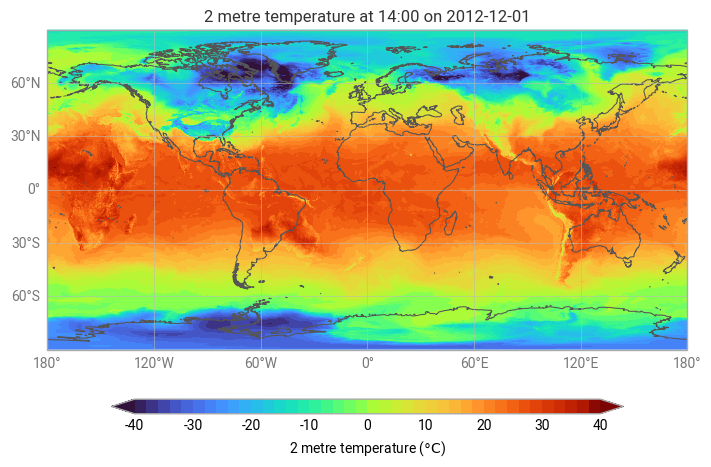

In [7]:
earthkit.plots.quickmap.plot(da.rename(dict(valid_time="time")), units="degC");